In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('wine.data', header = None) # we don't want any row to be feature 

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
               'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']

In [5]:
data.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data['Class label'].unique()

array([1, 2, 3], dtype=int64)

In [7]:
# for random partitioning use the train_test_split
from sklearn.model_selection import train_test_split as ttsp
X,Y = data.iloc[:,1:].values , data.iloc[:,0].values
X_train, X_test, y_train, y_test = ttsp(X,Y,test_size = 0.2,random_state = 1,stratify = Y)

In [8]:
print(X_train.shape)

(142, 13)


# Feature Scaling:
* <b>There are two common approaches to bringing different features onto the same scale: normalization and standardization.
* <b>Normalization is a special case of min-max scaling.  

In [9]:
#Normalization refers to the rescaling of the features to a range of [0, 1],
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)

In [10]:
X_test_norm = mms.transform(X_test) # Use same learned parameters for the training set 

In [11]:
# Standerdization is sacling to (zero mean and unit variance)
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
X_tr_Std = ssc.fit_transform(X_train)
X_te_Std = ssc.transform(X_test)

In [12]:
# The RobustScaler is especially helpful and recommended if we are working with small datasets that contain many outliers. 
print(X_tr_Std.shape, ' and ',y_train.shape)

(142, 13)  and  (142,)


# Feature Selection:
* <b>Overfitting means our model is too complex for the given training data.
<h1> Common Solutions : </h1>
   <b> <li>Collecting more training data</li> <li>Using Regularization</li> 
   <b> <li>Choosing Simpler model with fewer features</li> <li>Dimensionality Reduction</li>
    

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l1',C= 3.0,solver='liblinear',multi_class='ovr')

In [14]:
logreg.fit(X_train_norm,y_train)
train_acc = logreg.score(X_tr_Std,y_train)
print('training accuracy is : {} %'.format(train_acc*100) )

training accuracy is : 97.1830985915493 %


In [15]:
test_acc = logreg.score(X_te_Std,y_test)
print('test accuracy is : {} %'.format(test_acc*100))

test accuracy is : 97.22222222222221 %


In [16]:
#we can access the intercept terms via the intercept_ attribute
#Since we fit the LogisticRegression object on a multiclass dataset via the one-vs.-rest (OvR) approach,
#the first intercept belongs to the model that fits class 1 versus classes 2 and 3,
print(logreg.intercept_)

[-8.24946055  5.53568982  0.        ]


In [17]:
print(logreg.coef_) #The weight array
#Three rows of weight coefficients, one weight vector for each class. 

[[  4.97208774   0.           1.70076363  -5.45306038   0.
    0.           4.03675858   0.           0.           0.
    0.           3.47185633   8.35043175]
 [ -6.41630424  -1.35884921  -2.8798976    1.9851503    0.
    0.           0.66499329   0.           1.55178571  -6.79586001
    5.49202544   0.          -9.22432482]
 [  0.           1.99346556   1.03491409   0.           0.
    0.         -10.56569293   0.           0.           6.7692176
   -2.7112524   -3.68536591   0.        ]]


In [18]:
#In scikit-learn, the intercept_ corresponds to 𝑤𝑤0 and coef_ corresponds to the values 𝑤𝑤𝑗𝑗 for j > 0.

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black','pink',
          'lightgreen', 'lightblue','gray', 'indigo', 'orange']
weights, params = [],[]

In [20]:
import numpy as np
for c in np.arange(-4.,6.0):
    lr = LogisticRegression(penalty='l1',C=(10)**c,solver='liblinear',multi_class='ovr',random_state=1)
    lr.fit(X_tr_Std,y_train)
    weights.append(lr.coef_)
    params.append(10**c)
weights = np.array(weights)

No handles with labels found to put in legend.


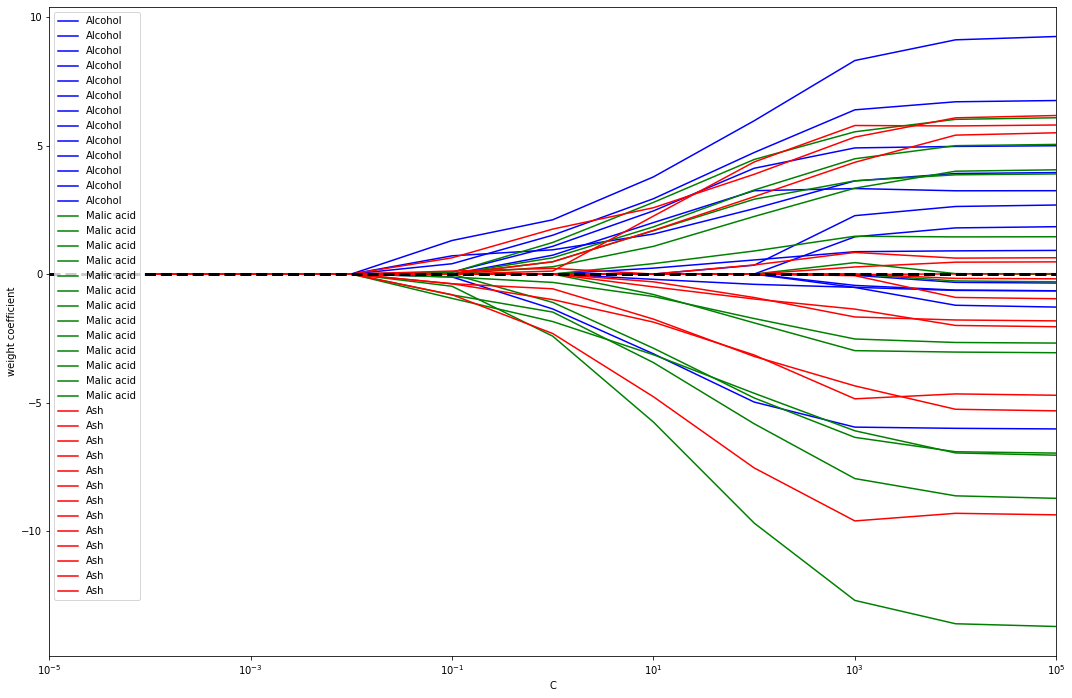

In [122]:
plt.figure(figsize=(15,10))
for column,color in zip(range(weights.shape[1]),colors):
    plt.plot(params,weights[:,column],label = data.columns[column+1],color = color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')     
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38, 1.03),ncol=1, fancybox=True)
plt.tight_layout()
plt.show()

# SBS in Python from scratch:

In [22]:
# helper modules
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts

In [23]:
class SBS():
    def __init__(self,estimator,k_features,scoring = accuracy_score,test_size = 0.2,random_state = 0):
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.scoring = scoring
        self.test_size = test_size
        self.random_state = random_state
    def fit(self,X,Y):
        assert(X.shape[0]==Y.shape[0])
        X_train,X_test,y_train,y_test = tts(X,Y,test_size = self.test_size,random_state = self.random_state,stratify = Y)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._return_score(X_train,y_train,X_test,y_test,self.indices_)
        self.scores_ = [score]
        self.dim_ = []
        while dim > self.k_features:
            scores = []
            subsets = []
            self.dim_.append(dim)
            for p in combinations(self.indices_,r=dim-1):
                score = self._return_score(X_train,y_train,X_test,y_test,p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
            self._k_score = self.scores_[-1]
        return self
    def transform(self,X):
        return X[:,self.indices_]
    def _return_score(self,X_train,y_train,X_test,y_test,indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score
        
        

In [24]:
#SBS implementation using Knn
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
sb = SBS(estimator=Knn,k_features=1)
sb.fit(X_train,y_train)

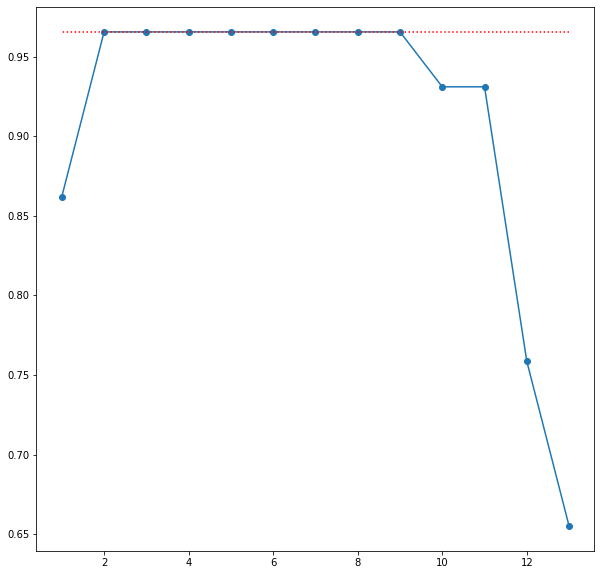

In [41]:
x = [len(x) for x in sb.subsets_]
y = sb.scores_
plt.figure(figsize=(10,10))
plt.plot(x,y,marker = 'o')
plt.plot(x,[max(y)for _ in x],'r:')
plt.show()

# Feature Importance Using Random Forest:

In [46]:
from sklearn.ensemble import RandomForestClassifier
features = data.columns[1:] # 1st column is for class labels
forest = RandomForestClassifier(n_estimators=600,random_state=0) # n_estimators refers to number of trees
forest.fit(X_train,y_train)
feat_imp = forest.feature_importances_

In [55]:
indices = np.argsort(feat_imp)[::-1] # np.argsort :Array of indices that sort a along the specified axis

In [56]:
print(indices)

[ 6  9 12  0 11 10  5  1  8  3  4  2  7]


In [118]:
for f in range(X_train.shape[1]):
    print('"',str(f+1)+" "*(len(str(f+1))-2)**2,'|',30,features[f],feat_imp[f],'"')
    print("_________________________________________________")


" 1  | 30 Alcohol 0.14780448116669606 "
_________________________________________________
" 2  | 30 Malic acid 0.029126563928162447 "
_________________________________________________
" 3  | 30 Ash 0.012195680583124972 "
_________________________________________________
" 4  | 30 Alcalinity of ash 0.026659669399578114 "
_________________________________________________
" 5  | 30 Magnesium 0.023536107666375504 "
_________________________________________________
" 6  | 30 Total phenols 0.06241904063809365 "
_________________________________________________
" 7  | 30 Flavanoids 0.16476422257460632 "
_________________________________________________
" 8  | 30 Nonflavanoid phenols 0.011845575018234335 "
_________________________________________________
" 9  | 30 Proanthocyanins 0.026697628940951724 "
_________________________________________________
" 10 | 30 Color intensity 0.15629675394909728 "
_________________________________________________
" 11 | 30 Hue 0.07630095562358724 "
_________

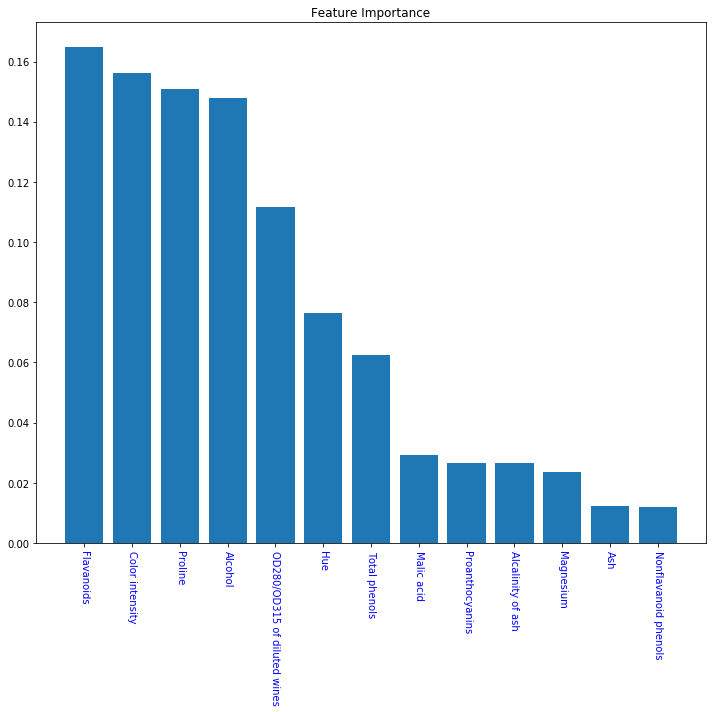

In [123]:
plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),feat_imp[indices],align='center')
plt.xticks(range(X_train.shape[1]),features[indices] ,rotation=270,color='b')
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [132]:
X_train_df = pd.DataFrame(X_train,columns=data.columns[1:])
y_train_df = pd.DataFrame(y_train,columns=[data.columns[1]])
X_test_df = pd.DataFrame(X_test,columns=data.columns[1:])
y_test_df = pd.DataFrame(y_test,columns=[data.columns[1]])

In [133]:
X_train_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
2,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0
3,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0
4,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0


In [143]:
X_train_df.to_csv('X_train_df.csv')
X_test_df.to_csv('X_test_df.csv')
y_train_df.to_csv('y_train_df.csv')
y_test_df.to_csv('y_test_df.csv')